In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
mba = msrp_band_analyzer.MSRPBand()

In [ ]:
mba.update_company_data(['EL', 'EMM'])

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-02-22

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2022-02-07
Latest download summary: 2022-02-22

[SUCCESS] All download summaries look good!


In [ ]:
mba.add_new_columns()

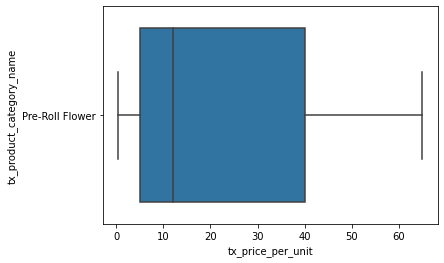

Total number of transactions: 1634
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.004895960832313341 %


In [5]:
mba.boxplot_distribution_outlier_check('tx_product_category_name', 'Pre-Roll Flower', 'S')

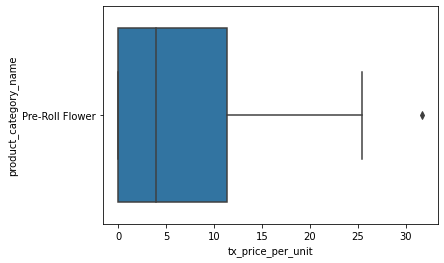

Total number of transactions: 92
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.021739130434782608 %


In [6]:
mba.boxplot_distribution_outlier_check('product_category_name', 'Pre-Roll Flower', 'C')

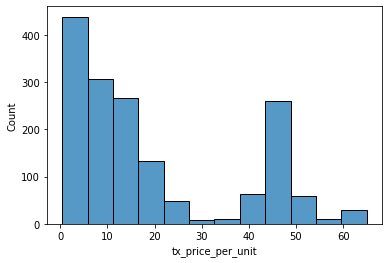

In [7]:
mba.histogram_distribution_check('tx_product_category_name', 'Pre-Roll Flower', 'S')

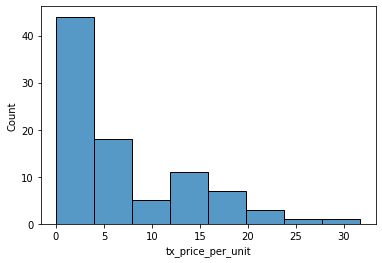

In [8]:
mba.histogram_distribution_check('product_category_name', 'Pre-Roll Flower', 'C')

In [15]:
mba.summary_table_by_category('tx_product_category_name', 'Pre-Roll Flower', 'S')

count    1634.000
mean       19.459
std        17.369
min         0.410
25%         5.000
50%        12.000
75%        40.000
max        65.000
Name: Pre-Roll Flower, dtype: float64


In [16]:
mba.summary_table_by_category('product_category_name', 'Pre-Roll Flower', 'C')

count    90.000
mean      6.424
std       7.285
min       0.005
25%       0.010
50%       4.000
75%      11.381
max      31.750
Name: Pre-Roll Flower, dtype: float64


In [17]:
mba.summary_table_by_category_time('tx_product_category_name', 'Pre-Roll Flower', 'S')

               count    mean     std    min   25%   50%     75%   max
date_in_month                                                        
2020-09          9.0  21.278   7.500   9.00  20.0  22.5  25.000  30.0
2020-10         28.0  13.062   8.197   1.00  10.0  10.0  21.562  30.0
2020-11         30.0  26.917  12.512  10.00  24.0  25.0  37.875  45.0
2020-12         96.0  15.633  12.840   4.25   5.0  10.0  24.000  45.0
2021-01         89.0   8.961   7.940   1.00   5.0   5.0  10.000  58.5
2021-02         66.0  23.886  19.392   1.00  10.0  15.0  35.000  65.0
2021-03         88.0  20.443  15.390   4.50  10.0  15.0  36.000  65.0
2021-04        129.0  23.930  17.389   1.00  10.0  16.0  45.000  65.0
2021-05        172.0  11.986  13.250   0.41   1.0  10.0  18.000  50.0
2021-06        121.0  13.045  15.032   1.00   1.0   5.0  20.000  50.0
2021-07        212.0  16.417  17.878   1.00   1.0  10.0  40.000  50.0
2021-08        111.0  19.745  19.957   1.00   1.0  15.0  45.000  60.0
2021-09         71.0

In [18]:
mba.summary_table_by_category_time('product_category_name', 'Pre-Roll Flower', 'C')

               count    mean     std     min     25%     50%     75%    max
date_in_month                                                              
2020-09          8.0   4.439   4.973   0.005   0.005   2.500   9.000  12.50
2020-10          3.0   0.010   0.000   0.010   0.010   0.010   0.010   0.01
2020-11          1.0  18.000     NaN  18.000  18.000  18.000  18.000  18.00
2020-12          5.0   1.452   0.938   0.010   1.000   2.000   2.000   2.25
2021-01         12.0   7.681  10.415   0.010   0.010   4.300   7.858  31.75
2021-02         12.0   7.333   6.583   1.000   2.000   4.000  12.000  20.00
2021-03          4.0  11.252   7.495   0.010  11.252  15.000  15.000  15.00
2021-04          4.0   6.255   8.495   0.010   0.010   3.505   9.750  18.00
2021-05          2.0   0.020   0.000   0.020   0.020   0.020   0.020   0.02
2021-06          1.0   0.010     NaN   0.010   0.010   0.010   0.010   0.01
2021-07          8.0   4.879   6.465   0.010   0.010   2.500   6.750  15.00
2021-08     

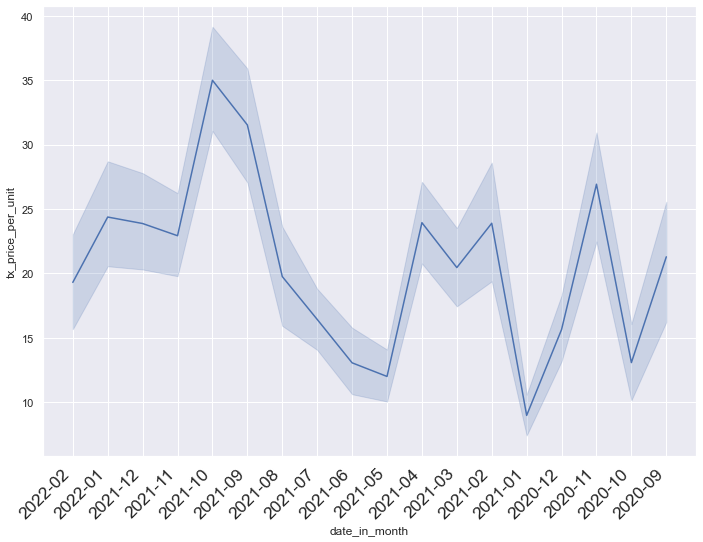

In [21]:
mba.line_plot_time_series_msrp_by_category('tx_product_category_name', 'Pre-Roll Flower', 'S', 95, 'band')

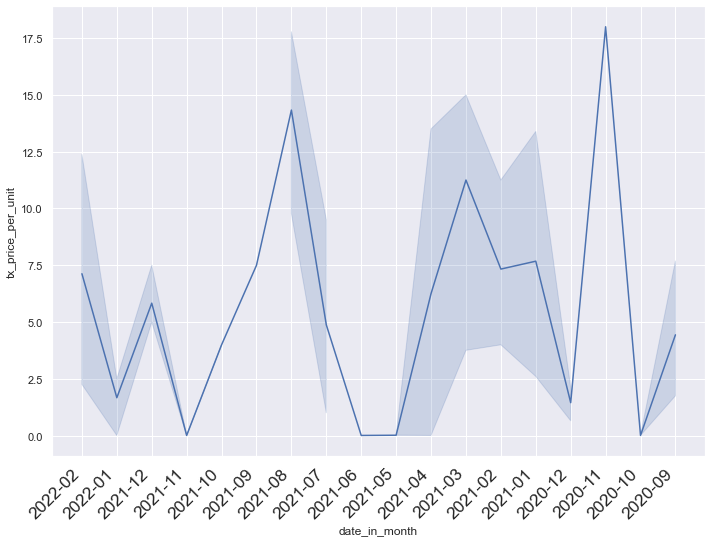

In [22]:
mba.line_plot_time_series_msrp_by_category('product_category_name', 'Pre-Roll Flower', 'C', 95, 'band')

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 1634


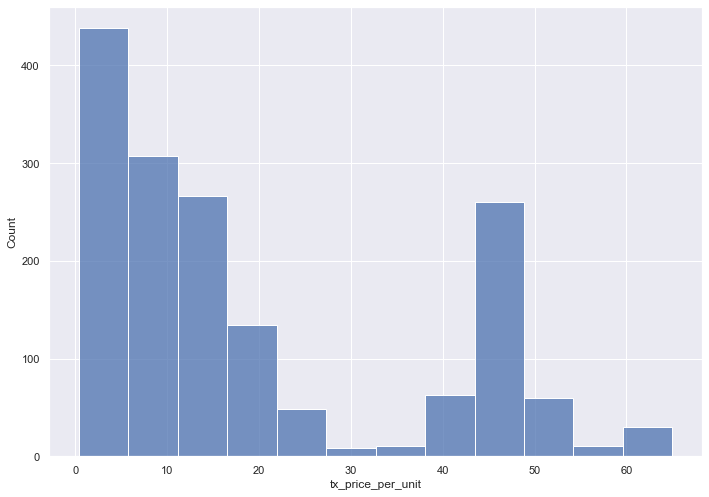

### Outputting summary table ### 	
count    1634.00
mean       19.46
std        17.37
min         0.41
25%         5.00
50%        12.00
75%        40.00
max        65.00
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean    std    min   25%   50%    75%   max
date_in_month                                                     
2020-09          9.0  21.28   7.50   9.00  20.0  22.5  25.00  30.0
2020-10         28.0  13.06   8.20   1.00  10.0  10.0  21.56  30.0
2020-11         30.0  26.92  12.51  10.00  24.0  25.0  37.88  45.0
2020-12         96.0  15.63  12.84   4.25   5.0  10.0  24.00  45.0
2021-01         89.0   8.96   7.94   1.00   5.0   5.0  10.00  58.5
2021-02         66.0  23.89  19.39   1.00  10.0  15.0  35.00  65.0
2021-03         88.0  20.44  15.39   4.50  10.0  15.0  36.00  65.0
2021-04        129.0  23.93  17.39   1.00  10.0  16.0  45.00  65.0
2021-05        172.0  11.99  13.25   0.41   1.0  10.0  1

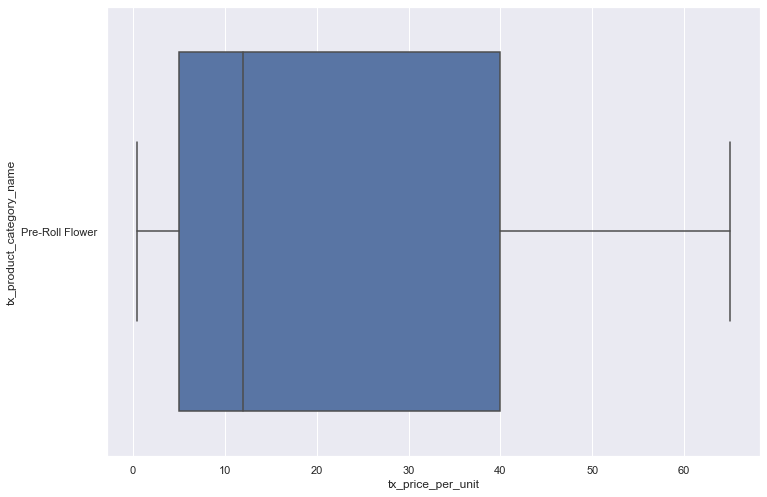

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.004895960832313341 %
### Outputting time series line plot of MSRP ### 	


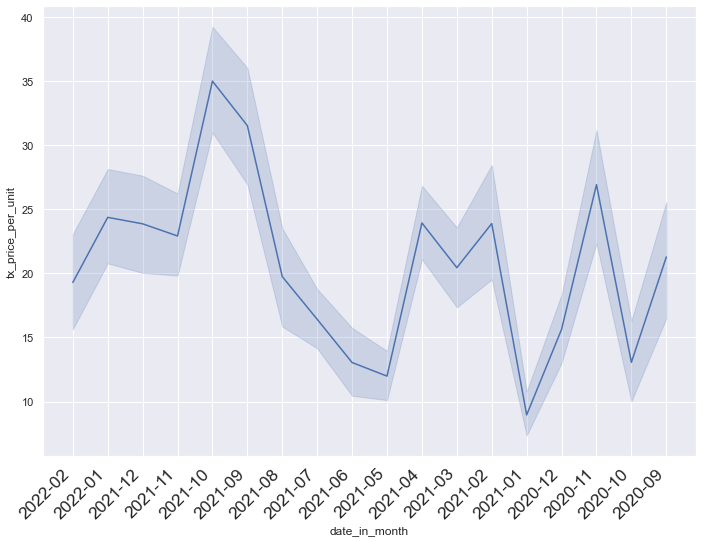

In [29]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')

Total number of transactions for Pre-Roll Flower in product_category_name : 92


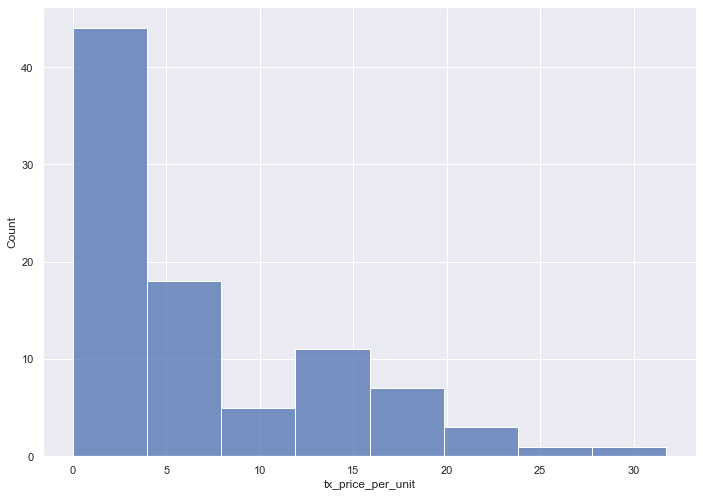

count    90.00
mean      6.42
std       7.29
min       0.00
25%       0.01
50%       4.00
75%      11.38
max      31.75
Name: Pre-Roll Flower, dtype: float64
               count   mean    std    min    25%    50%    75%    max
date_in_month                                                        
2020-09          8.0   4.44   4.97   0.00   0.00   2.50   9.00  12.50
2020-10          3.0   0.01   0.00   0.01   0.01   0.01   0.01   0.01
2020-11          1.0  18.00    NaN  18.00  18.00  18.00  18.00  18.00
2020-12          5.0   1.45   0.94   0.01   1.00   2.00   2.00   2.25
2021-01         12.0   7.68  10.41   0.01   0.01   4.30   7.86  31.75
2021-02         12.0   7.33   6.58   1.00   2.00   4.00  12.00  20.00
2021-03          4.0  11.25   7.50   0.01  11.25  15.00  15.00  15.00
2021-04          4.0   6.26   8.50   0.01   0.01   3.50   9.75  18.00
2021-05          2.0   0.02   0.00   0.02   0.02   0.02   0.02   0.02
2021-06          1.0   0.01    NaN   0.01   0.01   0.01   0.01   0.01
20

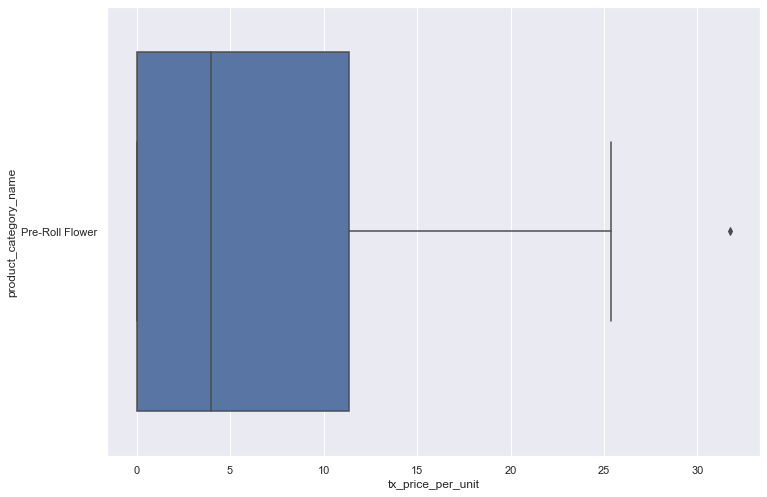

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.021739130434782608 %


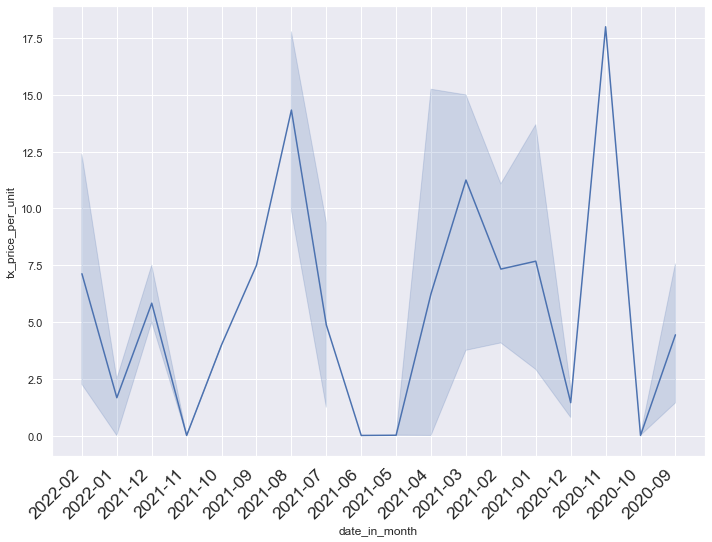

In [27]:
mba.run_analysis('product_category_name', 'Pre-Roll Flower', 'C')